In [1]:
import numpy as np
from itertools import product

from qiskit import Aer, ClassicalRegister, execute, QuantumRegister, transpile
from qiskit.circuit import QuantumCircuit
from qiskit.extensions import RYGate, XGate
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram

from tridiagonal_matrix import block_encoding, signal_oracle, unitary_iterate

## Tri-diagonal matrix
Block encoding of $A / 4$, where
$$
A = \begin{bmatrix}
\alpha & \gamma & 0 & 0 \\
\beta & \alpha & \gamma & 0 \\
0 & \beta & \alpha & \gamma  \\
0 & 0 & \beta & \alpha
\end{bmatrix}
$$

In [2]:
def subspace_sv(num_qubits, num_aux_qubits, sv):
    row_vec = np.zeros(2 ** num_qubits)
    keys = ["".join(k) for k in product("01", repeat=num_qubits)]
    
    for j, key in enumerate(keys):
        idx = int(key + "0" * num_aux_qubits, 2)
        row_vec[j] = np.real(sv[idx])
    
    return row_vec

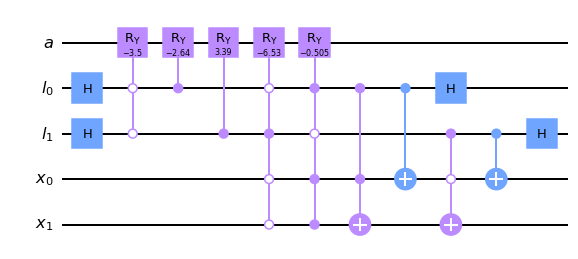

In [3]:
alpha = 0.75
beta = 0.25
gamma = - 0.125

num_sys_qubits = 2
qc = block_encoding(alpha, beta, gamma, num_sys_qubits, i=0, j=0, add_measurements=False)
qc.draw("mpl", fold=-1)

### Check $\langle 0^{\otimes 2} | \langle j | U_A | 0^{\otimes 2} \rangle | i \rangle = A_{ij} / 4$

In [4]:
num_aux_qubits = 3

for i in range(2 ** num_sys_qubits):
    qc = block_encoding(alpha, beta, gamma, num_sys_qubits, i=i, j=0, add_measurements=False)
    print(subspace_sv(num_sys_qubits, num_aux_qubits, Statevector(qc).data))

[1.87500000e-01 6.25000000e-02 0.00000000e+00 5.96184092e-17]
[-0.03125  0.1875   0.0625   0.     ]
[ 0.      -0.03125  0.1875   0.0625 ]
[-2.62596654e-17  0.00000000e+00 -3.12500000e-02  1.87500000e-01]


In [5]:
print(0.1875 * 4)
print(0.0625 * 4)
print(- 0.03125 * 4)

0.75
0.25
-0.125


## Tri-diagonal matrix
Block encoding of $A / 4$, where
$$
A = \begin{bmatrix}
\alpha & \gamma & 0 & 0 & 0 & 0 & 0 & 0 \\
\beta & \alpha & \gamma & 0 & 0 & 0 & 0 & 0 \\
0 & \beta & \alpha & \gamma & 0 & 0 & 0 & 0 \\
0 & 0 & \beta & \alpha & \gamma & 0 & 0 & 0 \\
0 & 0 & 0 & \beta & \alpha & \gamma & 0 & 0 \\
0 & 0 & 0 & 0 & \beta & \alpha & \gamma & 0 \\
0 & 0 & 0 & 0 & 0 & \beta & \alpha & \gamma \\
0 & 0 & 0 & 0 & 0 & 0 & \beta & \alpha
\end{bmatrix}
$$

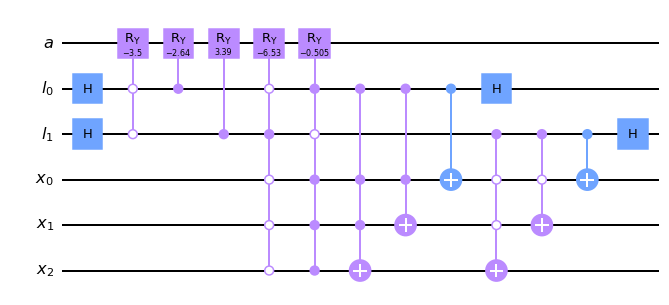

In [6]:
alpha = 0.75
beta = 0.25
gamma = - 0.125

num_sys_qubits = 3
qc = block_encoding(alpha, beta, gamma, num_sys_qubits, i=0, j=0, add_measurements=False)
qc.draw("mpl", fold=-1)

### Check $\langle 0^{\otimes 3} | \langle j | U_A | 0^{\otimes 3} \rangle | i \rangle = A_{ij} / 4$

In [7]:
for i in range(2 ** num_sys_qubits):
    qc = block_encoding(alpha, beta, gamma, num_sys_qubits, i=i, j=0, add_measurements=False)
    print(subspace_sv(num_sys_qubits, num_aux_qubits, Statevector(qc).data))

[ 1.87500000e-01  6.25000000e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.20454733e-18]
[-0.03125  0.1875   0.0625   0.       0.       0.       0.       0.     ]
[ 0.      -0.03125  0.1875   0.0625   0.       0.       0.       0.     ]
[ 0.       0.      -0.03125  0.1875   0.0625   0.       0.       0.     ]
[ 0.       0.       0.      -0.03125  0.1875   0.0625   0.       0.     ]
[ 0.       0.       0.       0.      -0.03125  0.1875   0.0625   0.     ]
[ 0.       0.       0.       0.       0.      -0.03125  0.1875   0.0625 ]
[ 4.69833942e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.12500000e-02  1.87500000e-01]


In [8]:
print(0.1875 * 4)
print(0.0625 * 4)
print(- 0.03125 * 4)

0.75
0.25
-0.125


## Tri-diagonal matrix
Block encoding of $A / 4$, where $A$ is $2^4 \times 2^4$ matrix.

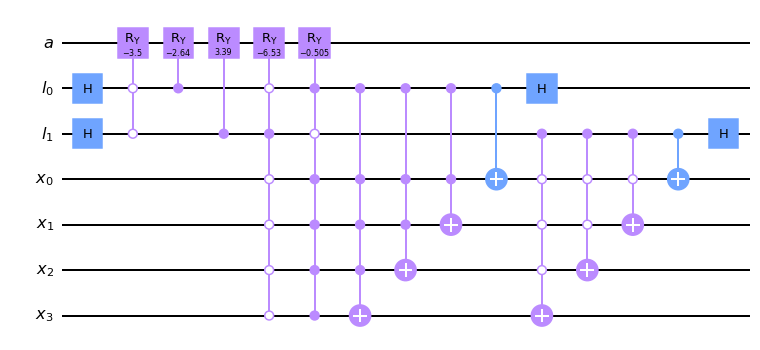

In [9]:
alpha = 0.75
beta = 0.25
gamma = - 0.125

num_sys_qubits = 4
qc = block_encoding(alpha, beta, gamma, num_sys_qubits, i=0, j=0, add_measurements=False)
qc.draw("mpl", fold=-1)

### Check $\langle 0^{\otimes 4} | \langle j | U_A | 0^{\otimes 4} \rangle | i \rangle = A_{ij} / 4$

In [10]:
for i in range(2 ** num_sys_qubits):
    qc = block_encoding(alpha, beta, gamma, num_sys_qubits, i=i, j=0, add_measurements=False)
    print(subspace_sv(num_sys_qubits, num_aux_qubits, Statevector(qc).data))

[1.87500000e-01 6.25000000e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.20939078e-17]
[-0.03125  0.1875   0.0625   0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.     ]
[ 0.      -0.03125  0.1875   0.0625   0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.     ]
[ 0.       0.      -0.03125  0.1875   0.0625   0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.     ]
[ 0.       0.       0.      -0.03125  0.1875   0.0625   0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.     ]
[ 0.       0.       0.       0.      -0.03125  0.1875   0.0625   0.
  0.       0.       0.       0.       0.       0.       0.       0.     ]
[ 0.       0.       0.       0.       0.     

## Tri-diagonal Hermitian matrix ($s > 2$)
Block encoding of $A / s$, where $A^{\dagger} = A$ and $s = 4$

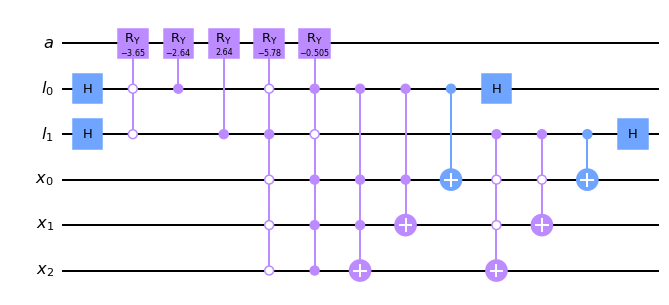

In [11]:
alpha = 0.75
beta = 0.25
gamma = 0.25

num_sys_qubits = 3
u = block_encoding(alpha, beta, gamma, num_sys_qubits, i=0, j=0, add_measurements=False)
u.draw("mpl", fold=-1)

### Signal oracle $U^{\prime} = SU$

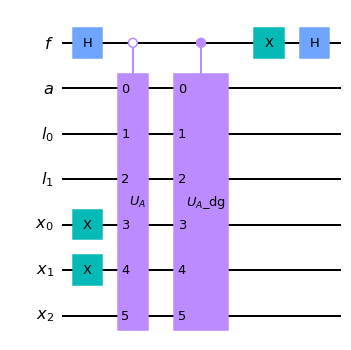

In [12]:
# signal operator
alpha = 0.75
beta = 0.25
gamma = 0.25

num_sys_qubits = 3
u = signal_oracle(alpha, beta, gamma, num_sys_qubits, i=3, j=0, add_measurements=False)
u.draw("mpl", fold=-1)

In [13]:
num_sys_qubits = 3
num_aux_qubits = 4

for i in range(2 ** num_sys_qubits):
    qc = signal_oracle(alpha, beta, gamma, num_sys_qubits, i=i, j=0, add_measurements=False)
    print(subspace_sv(num_sys_qubits, num_aux_qubits, Statevector(qc).data))

[ 1.87500000e-01  6.25000000e-02 -9.91690073e-18  1.05852205e-17
  5.01742810e-18 -7.29807584e-18  2.61236019e-17  5.59448838e-17]
[ 6.25000000e-02  1.87500000e-01  6.25000000e-02 -1.65274411e-17
  2.03592060e-18  1.61443182e-17 -1.30620526e-17  2.04236354e-18]
[-1.01680425e-17  6.25000000e-02  1.87500000e-01  6.25000000e-02
  5.50949098e-18 -1.08133859e-17 -1.74106941e-17  1.48816075e-18]
[ 5.05928980e-19  7.44517656e-19  6.25000000e-02  1.87500000e-01
  6.25000000e-02 -1.61735960e-17  2.27854221e-18 -1.36436156e-17]
[ 2.44692419e-17  4.81647296e-18 -2.26692118e-17  6.25000000e-02
  1.87500000e-01  6.25000000e-02 -2.29389315e-17 -1.12943396e-17]
[-6.86854112e-18  2.47647871e-18  1.55462992e-17  1.29077174e-17
  6.25000000e-02  1.87500000e-01  6.25000000e-02 -3.04697575e-17]
[-1.15518192e-17  8.92987143e-18 -2.49236957e-17 -3.55055702e-18
  2.20972480e-17  6.25000000e-02  1.87500000e-01  6.25000000e-02]
[-5.89225686e-18  1.04434297e-17  9.23862622e-18 -1.93563838e-17
 -1.09198818e-17  

In [14]:
print(0.1875 * 4)
print(0.0625 * 4)

0.75
0.25


### $\langle 0^{\otimes 4} | SUSU | 0^{\otimes 4} \rangle= I$

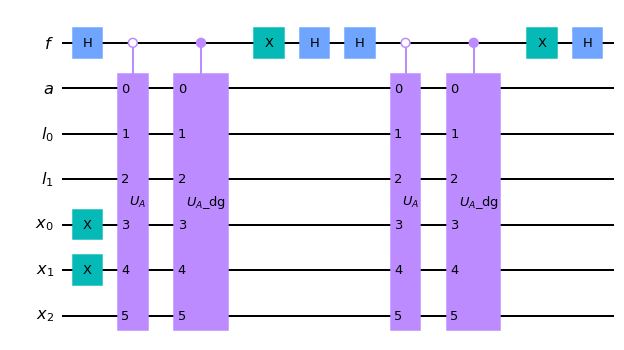

In [15]:
u = signal_oracle(alpha, beta, gamma, num_sys_qubits, i=3, j=0, add_measurements=False, rep=2)
u.draw("mpl", fold=-1)

In [16]:
for i in range(2 ** num_sys_qubits):
    qc = signal_oracle(alpha, beta, gamma, num_sys_qubits, i=i, j=0, add_measurements=False, rep=2)
    print(subspace_sv(num_sys_qubits, num_aux_qubits, Statevector(qc).data))

[ 1.00000000e+00 -1.87816482e-17  3.63348227e-17 -6.98102590e-18
  1.34036117e-16 -4.24018478e-18 -4.12647591e-17  3.63416799e-17]
[ 1.29789570e-17  1.00000000e+00  7.29765228e-18  3.31846684e-17
 -3.78210629e-19 -1.03530947e-16  1.13380942e-17 -5.80365232e-18]
[ 1.74551446e-17 -3.29930437e-17  1.00000000e+00  1.35585475e-17
  1.10847582e-16  2.01784031e-17 -2.64764706e-17  9.18148982e-20]
[ 4.88359368e-18  6.80841511e-17 -2.20108020e-17  1.00000000e+00
  4.44180691e-17 -5.14535244e-17 -8.35316105e-18  3.14425378e-17]
[ 3.29314408e-17  2.61567058e-17  5.04160189e-17  3.08086776e-17
  1.00000000e+00 -1.43887586e-17  5.23901515e-17 -4.50315189e-18]
[-8.60763122e-18  3.67229218e-17 -4.39350846e-18  6.97813794e-17
 -1.12649301e-17  1.00000000e+00  3.18774517e-17 -5.10241539e-17]
[-4.52250217e-17 -2.77536745e-18 -1.32628828e-17 -3.39717048e-18
  2.80936337e-17  6.87015145e-18  1.00000000e+00  1.51874165e-17]
[ 2.74570402e-18 -9.55823581e-18 -1.97738800e-17  1.14191454e-16
 -3.04136550e-18  

### Unitary iterate $W = (2 | 0^{\otimes 4} \rangle \langle 0^{\otimes 4}| - I) S U_A$

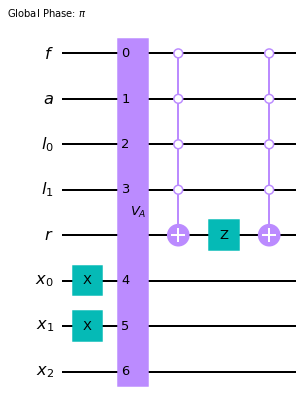

In [17]:
alpha = 0.75
beta = 0.25
gamma = 0.25

num_sys_qubits = 3
w = unitary_iterate(alpha, beta, gamma, num_sys_qubits, i=3, j=0, global_phase=np.pi, add_measurements=False)
w.draw("mpl", fold=-1)

### Check $\langle 0^{\otimes 5} | \langle j | W_A | 0^{\otimes 5} \rangle | i \rangle = A_{ij} / 4$

In [18]:
num_sys_qubits = 3
num_aux_qubits = 5

for i in range(2 ** num_sys_qubits):
    qc = unitary_iterate(
        alpha, 
        beta, 
        gamma, 
        num_sys_qubits = 3, 
        i=i, 
        j=0, 
        global_phase=np.pi, 
        add_measurements=False,
    )
    print(subspace_sv(num_sys_qubits, num_aux_qubits, Statevector(qc).data))

[ 1.87500000e-01  6.25000000e-02 -5.45192697e-18  1.74912877e-18
  1.33803284e-18 -1.82942313e-18  1.70434707e-17  5.95302894e-17]
[ 6.25000000e-02  1.87500000e-01  6.25000000e-02 -1.37593445e-17
  4.12644397e-18 -1.99516500e-17 -1.03885464e-17 -9.14104910e-18]
[-9.09513346e-18  6.25000000e-02  1.87500000e-01  6.25000000e-02
 -8.20986627e-18 -1.07654236e-17  3.00432580e-17  4.13408756e-18]
[ 2.85078499e-18  1.33743677e-17  6.25000000e-02  1.87500000e-01
  6.25000000e-02  7.92337839e-18 -3.51269982e-19 -4.64811064e-17]
[-5.05767491e-18  1.60096968e-17  4.18693149e-18  6.25000000e-02
  1.87500000e-01  6.25000000e-02 -1.41306155e-17 -9.13367223e-18]
[-6.65155761e-18  1.38654071e-17 -1.20833240e-17 -2.41565653e-18
  6.25000000e-02  1.87500000e-01  6.25000000e-02 -7.29924359e-19]
[ 6.95804174e-18  4.87312859e-18 -1.16767609e-17 -4.81630728e-18
 -1.85236866e-17  6.25000000e-02  1.87500000e-01  6.25000000e-02]
[ 5.86257161e-17  6.06700154e-18 -2.00440179e-18  4.31669099e-17
 -6.20545773e-18  

In [19]:
print(0.1875 * 4)
print(0.0625 * 4)

0.75
0.25
